# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 7s 136us/step - loss: 0.7920 - accuracy: 0.7190 - val_loss: 1.6582 - val_accuracy: 0.4869
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7772 - accuracy: 0.7240 - val_loss: 1.6169 - val_accuracy: 0.5022
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7618 - accuracy: 0.7297 - val_loss: 1.9132 - val_accuracy: 0.4570
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 8s 157us/step - loss: 2.3079 - accuracy: 0.1017 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.3081 - accuracy: 0.0988 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3087 - accuracy: 0.0973 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3076 - accuracy: 0.0997 - val_loss: 2.3162 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3083 - accuracy: 0.0997 - val_loss: 2.3232 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3079 - accuracy: 0.0998 - val_loss: 2.3227 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_______________________

50000/50000 [==============================] - 8s 157us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.3027 - accuracy: 0.0962 - val_loss:

50000/50000 [==============================] - 8s 168us/step - loss: 2.3071 - accuracy: 0.1007 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.3066 - accuracy: 0.1039 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.3067 - accuracy: 0.0981 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.3070 - accuracy: 0.1005 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.3073 - accuracy: 0.0977 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.3064 - accuracy: 0.1017 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3073 - accuracy: 0.0992 - val_loss:

50000/50000 [==============================] - 7s 146us/step - loss: 1.3258 - accuracy: 0.5339 - val_loss: 1.5117 - val_accuracy: 0.4679
Epoch 37/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3194 - accuracy: 0.5385 - val_loss: 1.4218 - val_accuracy: 0.4962
Epoch 38/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.3138 - accuracy: 0.5394 - val_loss: 1.4112 - val_accuracy: 0.4939
Epoch 39/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.3047 - accuracy: 0.5421 - val_loss: 1.5069 - val_accuracy: 0.4631
Epoch 40/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.2992 - accuracy: 0.5436 - val_loss: 1.4223 - val_accuracy: 0.4926
Epoch 41/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2886 - accuracy: 0.5476 - val_loss: 1.4328 - val_accuracy: 0.4841
Epoch 42/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2875 - accuracy: 0.5471 - val_loss: 1.39

Epoch 34/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8401 - accuracy: 0.3372 - val_loss: 1.9384 - val_accuracy: 0.3127
Epoch 35/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8392 - accuracy: 0.3363 - val_loss: 1.8867 - val_accuracy: 0.3206
Epoch 36/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8352 - accuracy: 0.3373 - val_loss: 1.8269 - val_accuracy: 0.3272
Epoch 37/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8372 - accuracy: 0.3368 - val_loss: 1.9168 - val_accuracy: 0.3000
Epoch 38/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8322 - accuracy: 0.3392 - val_loss: 1.8157 - val_accuracy: 0.3384
Epoch 39/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8344 - accuracy: 0.3382 - val_loss: 1.8312 - val_accuracy: 0.3328
Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8366 - accuracy: 0.3361 - val_

Epoch 32/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2032 - accuracy: 0.5795 - val_loss: 1.4006 - val_accuracy: 0.5049
Epoch 33/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.1938 - accuracy: 0.5814 - val_loss: 1.4275 - val_accuracy: 0.5037
Epoch 34/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1872 - accuracy: 0.5819 - val_loss: 1.3751 - val_accuracy: 0.5104
Epoch 35/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.1775 - accuracy: 0.5878 - val_loss: 1.3955 - val_accuracy: 0.5096
Epoch 36/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.1704 - accuracy: 0.5883 - val_loss: 1.3708 - val_accuracy: 0.5145
Epoch 37/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.1602 - accuracy: 0.5932 - val_loss: 1.3880 - val_accuracy: 0.5114
Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1543 - accuracy: 0.5955 - val_

Epoch 30/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5343 - accuracy: 0.4499 - val_loss: 1.6031 - val_accuracy: 0.4277
Epoch 31/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5166 - accuracy: 0.4553 - val_loss: 1.6207 - val_accuracy: 0.4221
Epoch 32/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5203 - accuracy: 0.4551 - val_loss: 1.5727 - val_accuracy: 0.4367
Epoch 33/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5216 - accuracy: 0.4523 - val_loss: 1.5839 - val_accuracy: 0.4413
Epoch 34/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5136 - accuracy: 0.4564 - val_loss: 1.5833 - val_accuracy: 0.4427
Epoch 35/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5067 - accuracy: 0.4588 - val_loss: 1.5726 - val_accuracy: 0.4357
Epoch 36/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5148 - accuracy: 0.4552 - val_

Epoch 28/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7769 - accuracy: 0.3799 - val_loss: 1.7774 - val_accuracy: 0.3836
Epoch 29/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7717 - accuracy: 0.3806 - val_loss: 1.7716 - val_accuracy: 0.3820
Epoch 30/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7668 - accuracy: 0.3835 - val_loss: 1.7673 - val_accuracy: 0.3849
Epoch 31/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7621 - accuracy: 0.3841 - val_loss: 1.7631 - val_accuracy: 0.3858
Epoch 32/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7573 - accuracy: 0.3854 - val_loss: 1.7619 - val_accuracy: 0.3889
Epoch 33/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7528 - accuracy: 0.3869 - val_loss: 1.7538 - val_accuracy: 0.3873
Epoch 34/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7482 - accuracy: 0.3879 - va

50000/50000 [==============================] - 8s 154us/step - loss: 1.1307 - accuracy: 0.5942 - val_loss: 1.5819 - val_accuracy: 0.4709
Epoch 26/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.1132 - accuracy: 0.6033 - val_loss: 1.6337 - val_accuracy: 0.4592
Epoch 27/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.0949 - accuracy: 0.6076 - val_loss: 1.5433 - val_accuracy: 0.4855
Epoch 28/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.0764 - accuracy: 0.6150 - val_loss: 1.5311 - val_accuracy: 0.4829
Epoch 29/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.0580 - accuracy: 0.6203 - val_loss: 1.5445 - val_accuracy: 0.4975
Epoch 30/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.0379 - accuracy: 0.6278 - val_loss: 1.6115 - val_accuracy: 0.4789
Epoch 31/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.0224 - accuracy: 0.6326 - val_loss:

50000/50000 [==============================] - 8s 154us/step - loss: 1.4100 - accuracy: 0.5093 - val_loss: 1.4956 - val_accuracy: 0.4633
Epoch 23/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4023 - accuracy: 0.5118 - val_loss: 1.4578 - val_accuracy: 0.4866
Epoch 24/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.3952 - accuracy: 0.5142 - val_loss: 1.4547 - val_accuracy: 0.4798
Epoch 25/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3869 - accuracy: 0.5182 - val_loss: 1.4478 - val_accuracy: 0.4861
Epoch 26/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.3813 - accuracy: 0.5200 - val_loss: 1.4499 - val_accuracy: 0.4915
Epoch 27/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.3741 - accuracy: 0.5218 - val_loss: 1.4357 - val_accuracy: 0.4897
Epoch 28/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3676 - accuracy: 0.5250 - val_loss:

50000/50000 [==============================] - 7s 136us/step - loss: 1.1534 - accuracy: 0.5873 - val_loss: 1.3790 - val_accuracy: 0.5174
Epoch 20/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1353 - accuracy: 0.5947 - val_loss: 1.4539 - val_accuracy: 0.5009
Epoch 21/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1266 - accuracy: 0.5981 - val_loss: 1.3623 - val_accuracy: 0.5254
Epoch 22/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.0925 - accuracy: 0.6111 - val_loss: 1.3408 - val_accuracy: 0.5342
Epoch 23/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.0764 - accuracy: 0.6155 - val_loss: 1.3683 - val_accuracy: 0.5277
Epoch 24/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.0613 - accuracy: 0.6205 - val_loss: 1.3858 - val_accuracy: 0.5262
Epoch 25/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.0329 - accuracy: 0.6308 - val_loss: 1

Epoch 17/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1598 - accuracy: 0.2367 - val_loss: 2.1583 - val_accuracy: 0.2360
Epoch 18/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1537 - accuracy: 0.2389 - val_loss: 2.1523 - val_accuracy: 0.2390
Epoch 19/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1478 - accuracy: 0.2435 - val_loss: 2.1464 - val_accuracy: 0.2435
Epoch 20/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1419 - accuracy: 0.2459 - val_loss: 2.1406 - val_accuracy: 0.2479
Epoch 21/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1362 - accuracy: 0.2503 - val_loss: 2.1350 - val_accuracy: 0.2500
Epoch 22/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1306 - accuracy: 0.2520 - val_loss: 2.1294 - val_accuracy: 0.2524
Epoch 23/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1251 - accuracy: 0.2543 - val_

Epoch 15/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.3619 - accuracy: 0.5212 - val_loss: 1.4913 - val_accuracy: 0.4674
Epoch 16/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3505 - accuracy: 0.5285 - val_loss: 1.4753 - val_accuracy: 0.4800
Epoch 17/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.3308 - accuracy: 0.5310 - val_loss: 1.4664 - val_accuracy: 0.4784
Epoch 18/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3168 - accuracy: 0.5396 - val_loss: 1.5592 - val_accuracy: 0.4443
Epoch 19/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3024 - accuracy: 0.5423 - val_loss: 1.4595 - val_accuracy: 0.4761
Epoch 20/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.2883 - accuracy: 0.5464 - val_loss: 1.4158 - val_accuracy: 0.4988
Epoch 21/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2706 - accuracy: 0.5540 - val

50000/50000 [==============================] - 4s 80us/step - loss: 1.7655 - accuracy: 0.3888 - val_loss: 1.7698 - val_accuracy: 0.3890
Epoch 13/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7592 - accuracy: 0.3898 - val_loss: 1.7634 - val_accuracy: 0.3896
Epoch 14/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7530 - accuracy: 0.3921 - val_loss: 1.7586 - val_accuracy: 0.3874
Epoch 15/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7472 - accuracy: 0.3932 - val_loss: 1.7533 - val_accuracy: 0.3924
Epoch 16/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7418 - accuracy: 0.3966 - val_loss: 1.7481 - val_accuracy: 0.3926
Epoch 17/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7367 - accuracy: 0.3976 - val_loss: 1.7425 - val_accuracy: 0.3948
Epoch 18/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7320 - accuracy: 0.3992 - val_loss: 1.7379

Epoch 10/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.3897 - accuracy: 0.5119 - val_loss: 1.4314 - val_accuracy: 0.4958
Epoch 11/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3604 - accuracy: 0.5210 - val_loss: 1.4374 - val_accuracy: 0.4868
Epoch 12/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.3325 - accuracy: 0.5343 - val_loss: 1.4124 - val_accuracy: 0.4960
Epoch 13/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.3171 - accuracy: 0.5380 - val_loss: 1.4160 - val_accuracy: 0.4957
Epoch 14/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2992 - accuracy: 0.5433 - val_loss: 1.3940 - val_accuracy: 0.5112
Epoch 15/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2795 - accuracy: 0.5506 - val_loss: 1.3836 - val_accuracy: 0.5119
Epoch 16/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.2629 - accuracy: 0.5565 - val_

50000/50000 [==============================] - 3s 70us/step - loss: 2.3354 - accuracy: 0.1199 - val_loss: 2.3323 - val_accuracy: 0.1225
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3317 - accuracy: 0.1229 - val_loss: 2.3286 - val_accuracy: 0.1262
Epoch 9/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3282 - accuracy: 0.1254 - val_loss: 2.3252 - val_accuracy: 0.1282
Epoch 10/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3249 - accuracy: 0.1277 - val_loss: 2.3220 - val_accuracy: 0.1313
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3217 - accuracy: 0.1298 - val_loss: 2.3190 - val_accuracy: 0.1325
Epoch 12/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3188 - accuracy: 0.1316 - val_loss: 2.3161 - val_accuracy: 0.1341
Epoch 13/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3160 - accuracy: 0.1331 - val_loss: 2.3134 -

Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7878 - accuracy: 0.3774 - val_loss: 1.7756 - val_accuracy: 0.3824
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7591 - accuracy: 0.3870 - val_loss: 1.7509 - val_accuracy: 0.3892
Epoch 7/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7348 - accuracy: 0.3969 - val_loss: 1.7289 - val_accuracy: 0.3963
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7128 - accuracy: 0.4043 - val_loss: 1.7081 - val_accuracy: 0.4073
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6943 - accuracy: 0.4109 - val_loss: 1.6935 - val_accuracy: 0.4096
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6781 - accuracy: 0.4167 - val_loss: 1.6937 - val_accuracy: 0.4116
Epoch 11/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6624 - accuracy: 0.4234 - val_loss:

50000/50000 [==============================] - 4s 78us/step - loss: 2.2208 - accuracy: 0.1958 - val_loss: 2.2076 - val_accuracy: 0.2091
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1992 - accuracy: 0.2125 - val_loss: 2.1895 - val_accuracy: 0.2217
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1827 - accuracy: 0.2250 - val_loss: 2.1750 - val_accuracy: 0.2309
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1691 - accuracy: 0.2348 - val_loss: 2.1628 - val_accuracy: 0.2371
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1575 - accuracy: 0.2416 - val_loss: 2.1520 - val_accuracy: 0.2421
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.1472 - accuracy: 0.2480 - val_loss: 2.1424 - val_accuracy: 0.2516
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1380 - accuracy: 0.2544 - val_loss: 2.1337 - val

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1239 - accuracy: 0.2469 - val_loss: 1.9975 - val_accuracy: 0.2992
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9273 - accuracy: 0.3288 - val_loss: 1.8786 - val_accuracy: 0.3529
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8423 - accuracy: 0.3597 - val_loss: 1.8206 - val_accuracy: 0.3663
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7932 - accuracy: 0.3755 - val_loss: 1.7779 - val_accuracy: 0.3839
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7579 - accuracy: 0.3878 - val_loss: 1.7481 - val_accuracy: 0.3945
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7285 - accuracy: 0.4004 - val_loss: 1.7238 - val_accuracy: 0.4020
Epoch 7/50
50000/50000 [==============================] - 4s 90us/st

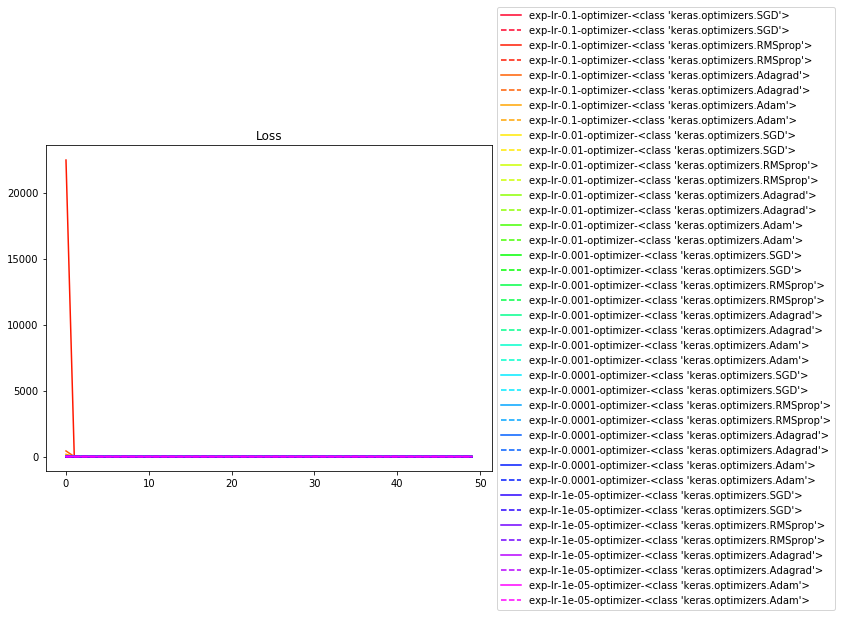

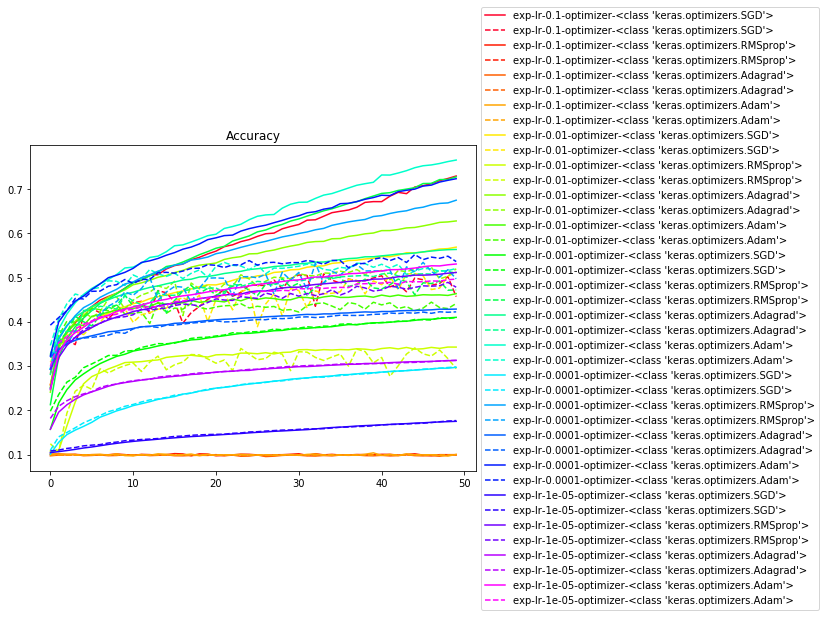

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
   
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()